In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

In [3]:
import nltk
# nltk.download('vader_lexicon')
# nltk.download('stopwords')
# nltk.download('punkt')


[nltk_data] Error loading vader_lexicon: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
fp='C:\\Users\\hp\\OneDrive\\Desktop\\Cognify Internship\\Dataset  - Copy (2).csv'
idf=pd.read_csv(fp)
idf

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [5]:
idf.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


In [6]:
idf.tail(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901
9550,5927402,Walter's Coffee Roastery,208,��stanbul,"Cafea��a Mahallesi, Bademalt۱ Sokak, No 21/B, ...",Moda,"Moda, ��stanbul",29.026016,40.984776,Cafe,...,Turkish Lira(TL),No,No,No,No,2,4.0,Green,Very Good,591


## Level:-3

**Task:-1**
    
    
- Analyze the text reviews to identify the most
common positive and negative keywords.

In [7]:
rating_texts=idf['Rating text']
rating_texts

0       Excellent
1       Excellent
2       Very Good
3       Excellent
4       Excellent
          ...    
9546    Very Good
9547    Very Good
9548         Good
9549    Very Good
9550    Very Good
Name: Rating text, Length: 9551, dtype: object

In [8]:
sia=SentimentIntensityAnalyzer()

stop_words=set(stopwords.words('english'))

In [9]:
positive=[]
negative=[]

In [10]:
for rating_text in rating_texts:
    tokens= word_tokenize(rating_text.lower())
    tokens=[token for token in tokens if token.isalpha() and token not in stop_words]
    
    sentiment_score=sia.polarity_scores(rating_text)['compound']
    
    if sentiment_score>=0.2:
        positive.extend(tokens)
    elif sentiment_score<=0.2:
        negative.extend(tokens)

In [11]:
positive_counts=Counter(positive)
negative_counts=Counter(negative)

In [12]:
num_top_keywords = 10
print('\nTop positive:')
for keyword, count in positive_counts.most_common(num_top_keywords):
    print(f"{keyword}:{count} times")


Top positive:
good:3179 times
excellent:301 times


In [13]:
print('\nTop Negative keywords:')
for keyword, count in negative_counts.most_common(num_top_keywords):
    print(f"{keyword}:{count} times")


Top Negative keywords:
average:3737 times
rated:2148 times
poor:186 times


- Calculate the average length of reviews and
explore if there is a relationship between
review length and rating.

In [14]:
df_analyze=idf[['Rating text','Aggregate rating']].copy()
df_analyze['Review Length']=df_analyze['Rating text'].apply(lambda x: len(str(x)))
ave_rev_len=df_analyze.groupby('Aggregate rating')['Review Length'].mean()

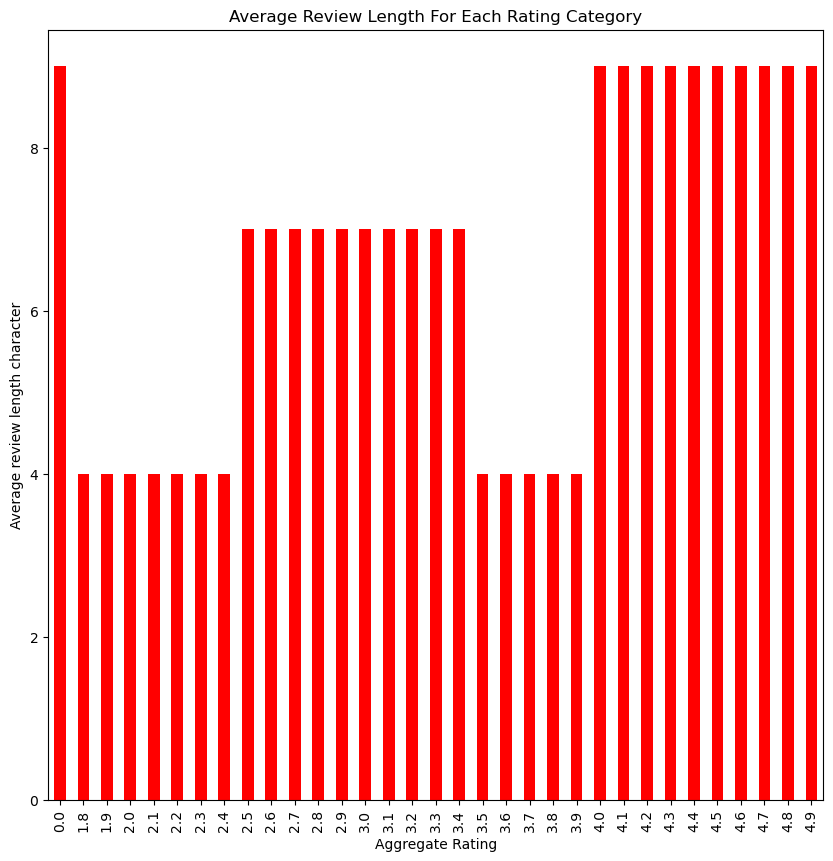

In [15]:
plt.figure(figsize=(10,10))
ave_rev_len.plot(kind='bar',color='red')
plt.title('Average Review Length For Each Rating Category')
plt.xlabel('Aggregate Rating')
plt.ylabel('Average review length character')
plt.show()

### Task 2

- Identify the restaurants with the highest and
lowest number of votes.

In [16]:
df_votes=idf[['Votes','Restaurant Name']]
df_votes

,Votes,Restaurant Name
0,314,Le Petit Souffle
1,591,Izakaya Kikufuji
2,270,Heat - Edsa Shangri-La
3,365,Ooma
4,229,Sambo Kojin
...,...,...
9546,788,Naml۱ Gurme
9547,1034,Ceviz A��ac۱
9548,661,Huqqa
9549,901,A���k Kahve


In [17]:
print('Restaurant with highest Voyytes:')
max_votes=df_votes.loc[df_votes['Votes'].idxmax()]
max_votes

Restaurant with highest Voyytes:


Votes              10934
Restaurant Name     Toit
Name: 728, dtype: object

In [18]:
print('Resaurant with lowest Votes:')
min_votes=df_votes.loc[df_votes['Votes'].idxmin()]
min_votes

Resaurant with lowest Votes:


Votes                             0
Restaurant Name    Cantinho da Gula
Name: 69, dtype: object

# - Analyze if there is a correlation between the
number of votes and the rating of a
restaurant.

In [19]:
df_analysis = idf[['Votes','Aggregate rating']].copy()
df_analysis

,Votes,Aggregate rating
0,314,4.8
1,591,4.5
2,270,4.4
3,365,4.9
4,229,4.8
...,...,...
9546,788,4.1
9547,1034,4.2
9548,661,3.7
9549,901,4.0


In [20]:
corr=df_analysis['Votes'].corr(df_analysis["Aggregate rating"])
corr

0.31369058419541035

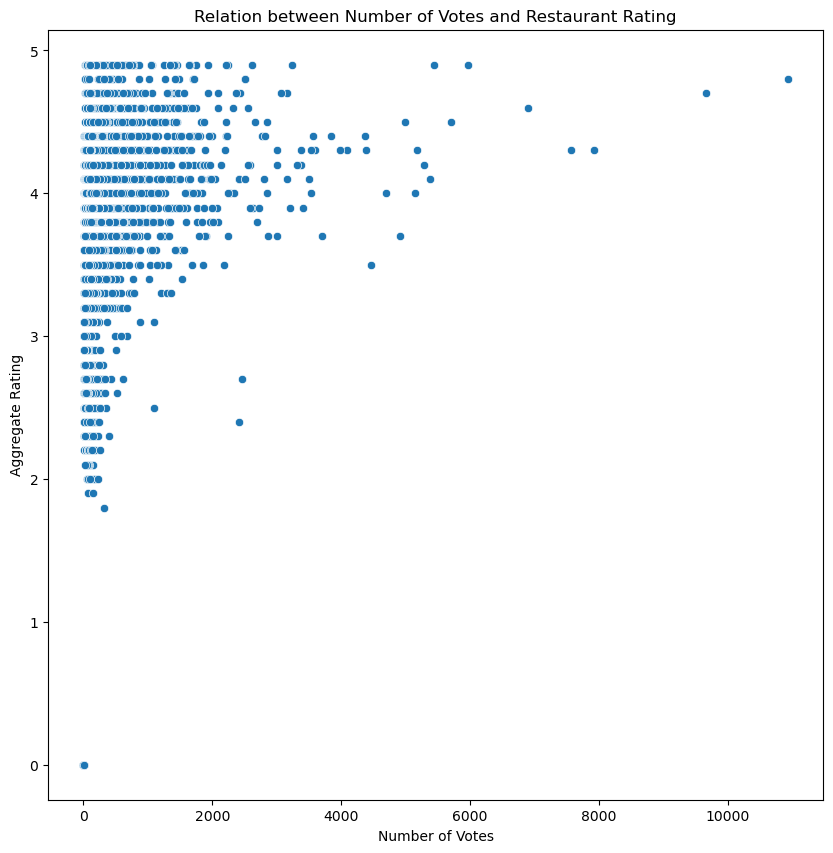

In [21]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='Votes',y='Aggregate rating',data=df_analysis)
plt.title('Relation between Number of Votes and Restaurant Rating')
plt.xlabel("Number of Votes")
plt.ylabel('Aggregate Rating')
plt.show()

## Task:-3

# **Task: Price Range vs. Online Delivery and
Table Booking**

# - Analyze if there is a relationship between the
price range and the availability of online
delivery and table booking

In [22]:
idf.head(1)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314


In [23]:
idf_analysis=idf[['Price range','Has Online delivery','Has Table booking']].copy()
idf_analysis['Has Online delivery']=idf_analysis['Has Online delivery'].map({'Yes':True,'No':False})
idf_analysis['Has table booking']=idf_analysis['Has Table booking'].map({'Yes':True,'No':False})

In [44]:
summary_table=pd.pivot_table(idf_analysis,index='Price range',values=['Has Online delivery','Has table booking'],aggfunc=sum)

In [45]:
print('Summary Table:')
summary_table

Summary Table:


,Has Online delivery,Has table booking
Price range,,
1,701,1
2,1286,239
3,411,644
4,53,274


In [46]:
summary_table

,Has Online delivery,Has table booking
Price range,,
1,701,1
2,1286,239
3,411,644
4,53,274


In [47]:
idf

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


<Figure size 1000x800 with 0 Axes>

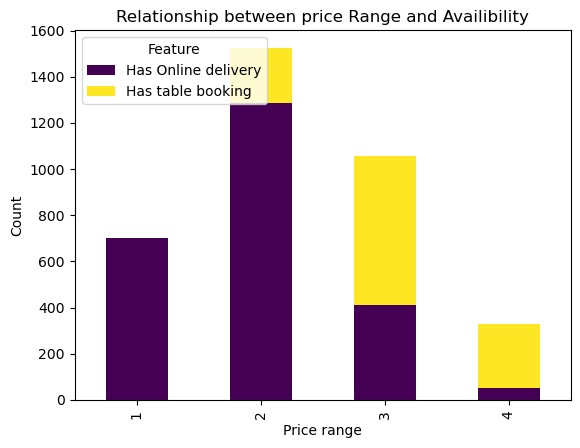

In [48]:
plt.figure(figsize=(10,8))
summary_table.plot(kind='bar',stacked=True,colormap='viridis')
plt.title('Relationship between price Range and Availibility')
plt.xlabel('Price range')
plt.ylabel('Count')
plt.legend(title='Feature',loc='upper left')
plt.show()

# - Determine if higher-priced restaurants are
more likely to offer these services

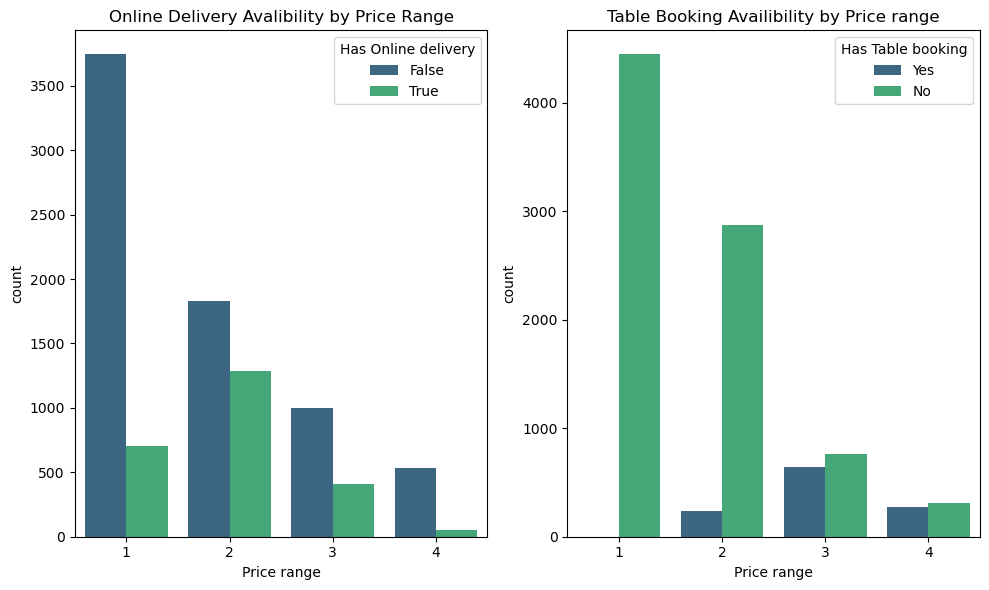

In [53]:
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)

sns.countplot(x='Price range' , hue='Has Online delivery' , data=idf_analysis,palette='viridis')
plt.title('Online Delivery Avalibility by Price Range')

plt.subplot(1,2,2)
sns.countplot(x='Price range', hue='Has Table booking', data=idf_analysis,palette='viridis')
plt.title('Table Booking Availibility by Price range')

plt.tight_layout()
plt.show()